# DACON : 신용카드 사용자 연체 예측

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('C:/Users/user/Desktop/open/train.csv')
test = pd.read_csv('C:/Users/user/Desktop/open/test.csv')
submission = pd.read_csv('C:/Users/user/Desktop/open/sample_submission.csv')

In [3]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [5]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


# DATA FIELD

In [6]:
def summary(df_train):
    frame_info = []
    for col in df_train.columns:
        # column, column unique 길이, column null 갯수, column 데이터 형태, column 데이터
        frame_info.append([col, len(df_train[col].unique()), df_train[col].isnull().sum(), df_train[col].dtype, df_train[col].unique()[:5]])

# frame_info를 dataframe 형태로 변환
    df_info = pd.DataFrame(frame_info, columns=['name', 'num_of_unique', 'num_of_nan', 'dtype', 'front5_values'])
    return df_info

In [7]:
summary(train)

,name,num_of_unique,num_of_nan,dtype,front5_values
0,index,26457,0,int64,"[0, 1, 2, 3, 4]"
1,gender,2,0,object,"[F, M]"
2,car,2,0,object,"[N, Y]"
3,reality,2,0,object,"[N, Y]"
4,child_num,9,0,int64,"[0, 1, 2, 3, 4]"
5,income_total,249,0,float64,"[202500.0, 247500.0, 450000.0, 157500.0, 27000..."
6,income_type,5,0,object,"[Commercial associate, Working, State servant,..."
7,edu_type,5,0,object,"[Higher education, Secondary / secondary speci..."
8,family_type,5,0,object,"[Married, Civil marriage, Separated, Single / ..."
9,house_type,6,0,object,"[Municipal apartment, House / apartment, With ..."


# DATA

- gender : 성별 (남:1, 여:0)
- car : 차량 소유 여부 (Y:1, N:0)
- reality : 부동산 소유 여부 (Y:1, N:0)
- child_num : 자녀 수 (int)
- income_total : 연간 소득 (float)
- income_type : 소득 분류 (object)
- edu_type : 교육 수준 (object)
- family_type : 결혼 여부 (object)
- house_type : 생활 방식 (object)
- days_birth : 출생일 (abs 처리해서 높을 수록 나이가 많다)
- days_employed : 업무 시작일 (음수:근로자 상태, 양수: 백수 상태)
- flag_mobil : 핸드폰 소유 여부 (Y:1, 모두 다 소유)
- work_phone : 업무용 전화 소유 여부 (Y:1, N:0)
- phone : 전화 소유 여부 (Y:1, N:0)
- email : 이메일 소유 여부 (Y:1, N:0)
- occyp_type : 직업 유형 (object)
- family_size : 가족 규모 (int)
- begin_month : 신용카드 발급 월 (abs 처리해서 신용카드 가진 개월 수) (int)
- credit : 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (낮을수록 높은 신용의 신용카드 사용자)

[0, 1, 2, 3, 4, 5, 7, 14, 19]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 15.0, 20.0]


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


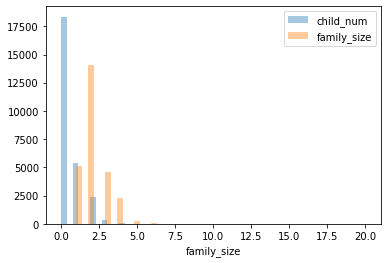

In [8]:
# child_num, family_size

print(sorted(train['child_num'].unique()))
print(sorted(train['family_size'].unique()))

sns.distplot(train['child_num'], kde=False, label='child_num')
sns.distplot(train['family_size'], kde=False, label='family_size')
plt.legend()

train.iloc[train[train['child_num']>=5].index,4] = 5
train.iloc[train[train['family_size']>=5.0].index,17] = 5

In [9]:
print(sorted(train['child_num'].unique()))
print(sorted(train['family_size'].unique()))

[0, 1, 2, 3, 4, 5]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [10]:
# edu_type

edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
train['edu_type'] = train['edu_type'].map(edu_order)

In [11]:
# days_birth, days_employed

def days_to_age(x):
    return (x*-1)/365

train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_age)
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_age)

In [12]:
# index, flag_mobiil, occyp_type

train = train.drop(['index'], axis=1)
train = train.drop(['FLAG_MOBIL'], axis=1)
train = train.drop(['occyp_type'], axis=1)

In [13]:
# begin_month

def minus(x):
    return x * -1

train['begin_month'] = train['begin_month'].apply(minus)

In [14]:
summary(train)

,name,num_of_unique,num_of_nan,dtype,front5_values
0,gender,2,0,object,"[F, M]"
1,car,2,0,object,"[N, Y]"
2,reality,2,0,object,"[N, Y]"
3,child_num,6,0,int64,"[0, 1, 2, 3, 4]"
4,income_total,249,0,float64,"[202500.0, 247500.0, 450000.0, 157500.0, 27000..."
5,income_type,5,0,object,"[Commercial associate, Working, State servant,..."
6,edu_type,5,0,int64,"[3, 1, 2, 0, 4]"
7,family_type,5,0,object,"[Married, Civil marriage, Separated, Single / ..."
8,house_type,6,0,object,"[Municipal apartment, House / apartment, With ..."
9,DAYS_BIRTH,6621,0,float64,"[38.07945205479452, 31.17808219178082, 52.2931..."


In [15]:
# 최종 형태 변환

train = train.astype({'edu_type': 'object'})
train = train.astype({'work_phone': 'object'})
train = train.astype({'phone': 'object'})
train = train.astype({'email': 'object'})
train = train.astype({'family_size': 'int'})
train = train.astype({'begin_month': 'int'})

In [16]:
summary(train)

,name,num_of_unique,num_of_nan,dtype,front5_values
0,gender,2,0,object,"[F, M]"
1,car,2,0,object,"[N, Y]"
2,reality,2,0,object,"[N, Y]"
3,child_num,6,0,int64,"[0, 1, 2, 3, 4]"
4,income_total,249,0,float64,"[202500.0, 247500.0, 450000.0, 157500.0, 27000..."
5,income_type,5,0,object,"[Commercial associate, Working, State servant,..."
6,edu_type,5,0,object,"[3, 1, 2, 0, 4]"
7,family_type,5,0,object,"[Married, Civil marriage, Separated, Single / ..."
8,house_type,6,0,object,"[Municipal apartment, House / apartment, With ..."
9,DAYS_BIRTH,6621,0,float64,"[38.07945205479452, 31.17808219178082, 52.2931..."


In [ ]:
## 끼악... 한시간동안 힘들었어요......
# credit 빼

In [17]:
from scipy.stats import norm, skew #for some statistics
numeric_cols = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
income_total,2.659120
child_num,1.750274
family_size,0.791984
begin_month,0.290034
DAYS_BIRTH,0.185976
credit,-1.124321
DAYS_EMPLOYED,-1.777495


In [18]:
# 양수는 log화
# 음수는 지수화로 변경

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))

skewed_features = skewness.index

for feat in skewed_features:
    train[feat] = np.log1p(train[feat])

There are 7 skewed numerical features to Box Cox transform


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
from scipy.stats import norm, skew #for some statistics
numeric_cols = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
child_num,1.177745
income_total,0.092328
family_size,0.075648
DAYS_EMPLOYED,-0.057313
DAYS_BIRTH,-0.188014
begin_month,-1.055579
credit,-1.510545


In [20]:
# standardscaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [21]:
# pandas-get_dummies
# gender, car, reality, income_type, edu_type, family_type, house_type, work_phone, phone, email

cat_cols = [x for x in train.columns if train[x].dtype == 'object']
print(cat_cols)

pd.get_dummies(train)

['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email']


,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,gender_F,gender_M,car_N,...,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1
0,-0.633875,0.408528,-0.380005,1.052973,-0.091276,-1.270826,-0.481395,1,0,1,...,1,0,0,0,1,0,1,0,1,0
1,1.061448,0.825883,-1.114131,-0.232331,0.964384,-1.451946,-0.481395,1,0,1,...,0,0,0,0,1,0,1,0,0,1
2,-0.633875,2.069264,0.792001,0.979866,-0.091276,0.126880,0.629976,0,1,0,...,0,0,0,0,1,0,0,1,1,0
3,-0.633875,0.408528,-0.077515,0.101521,-0.091276,0.716816,-2.381296,1,0,1,...,0,0,0,0,1,0,0,1,1,0
4,-0.633875,-0.114154,-0.090004,0.108445,-0.091276,0.315276,0.629976,1,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2.053148,0.627657,-0.895716,0.042545,1.783218,-2.266362,-0.481395,1,0,1,...,0,0,0,0,1,0,1,0,1,0
26453,1.061448,0.163564,-0.028207,0.291582,-0.091276,0.991302,0.629976,1,0,1,...,0,0,0,0,1,0,1,0,1,0
26454,-0.633875,1.173322,-1.556593,0.059746,-0.091276,0.270933,0.629976,1,0,0,...,0,0,0,1,1,0,1,0,1,0
26455,-0.633875,0.056884,-1.533878,-2.062919,-1.579145,1.253486,0.629976,0,1,1,...,0,0,0,0,1,0,1,0,1,0


In [22]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,-0.633875,0.408528,Commercial associate,3,Married,Municipal apartment,-0.380005,1.052973,0,0,0,-0.091276,-1.270826,-0.481395
1,F,N,Y,1.061448,0.825883,Commercial associate,1,Civil marriage,House / apartment,-1.114131,-0.232331,0,0,1,0.964384,-1.451946,-0.481395
2,M,Y,Y,-0.633875,2.069264,Working,3,Married,House / apartment,0.792001,0.979866,0,1,0,-0.091276,0.126880,0.629976
3,F,N,Y,-0.633875,0.408528,Commercial associate,1,Married,House / apartment,-0.077515,0.101521,0,1,0,-0.091276,0.716816,-2.381296
4,F,Y,Y,-0.633875,-0.114154,State servant,3,Married,House / apartment,-0.090004,0.108445,0,0,0,-0.091276,0.315276,0.629976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2.053148,0.627657,State servant,1,Married,House / apartment,-0.895716,0.042545,0,0,0,1.783218,-2.266362,-0.481395
26453,F,N,Y,1.061448,0.163564,Working,3,Separated,House / apartment,-0.028207,0.291582,0,0,0,-0.091276,0.991302,0.629976
26454,F,Y,N,-0.633875,1.173322,Working,1,Civil marriage,With parents,-1.556593,0.059746,0,0,0,-0.091276,0.270933,0.629976
26455,M,N,Y,-0.633875,0.056884,Working,2,Single / not married,House / apartment,-1.533878,-2.062919,0,0,0,-1.579145,1.253486,0.629976
